<a href="https://colab.research.google.com/github/jenniferamhajduk/AIML_Playground/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
torch.__version__

'2.1.0+cu121'

In [2]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [3]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [6]:
y[:5]

array([1, 1, 1, 1, 0])

In [7]:
circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label": y})

In [8]:
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


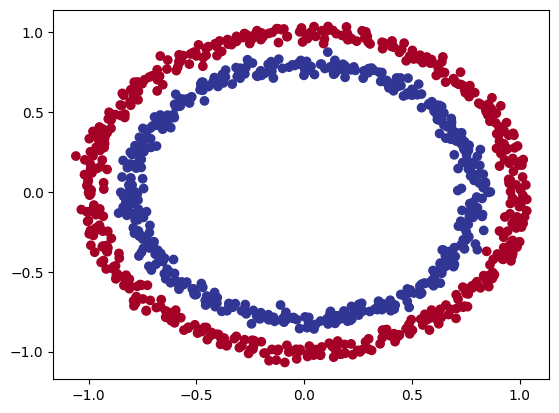

In [9]:
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [10]:
X.shape

(1000, 2)

In [11]:
y.shape

(1000,)

In [12]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [13]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [15]:
X_train.to(device)
X_test.to(device)
y_train.to(device)
y_test.to(device)
X.to(device)
y.to(device)

tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 1., 0., 

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [17]:
class circleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=8)
    self.layer_2 = nn.Linear(in_features=8, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

circle_model = circleModel().to(device)
circle_model


circleModel(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [18]:
sequential_model = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1)
).to(device)

In [19]:
sequential_model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [20]:
sequential_model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6484,  0.3746],
                      [-0.5600,  0.1614],
                      [-0.5965,  0.3809],
                      [ 0.4480, -0.0176],
                      [-0.3938,  0.0238],
                      [-0.0029,  0.6065],
                      [ 0.2299, -0.5984],
                      [ 0.0421,  0.2177]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4977,  0.1979,  0.3335,  0.1583, -0.2126, -0.6888,  0.4079, -0.2079],
                     device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3352, -0.0295,  0.1335,  0.0855, -0.2627,  0.2780, -0.2005,  0.1435]],
                     device='cuda:0')),
             ('1.bias', tensor([0.2270], device='cuda:0'))])

In [21]:
with torch.inference_mode():
  untrained_preds = sequential_model(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(untrained_preds)}, Shape {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.2627],
        [ 0.3268],
        [-0.1610],
        [ 0.3838],
        [-0.5669],
        [-0.5246],
        [-0.0225],
        [-0.2229],
        [-0.1432],
        [ 0.3266]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [22]:
loss_fn = nn.BCEWithLogitsLoss() #With sigmoid activation built in, more numerically stable that BCE with sigmoid after
optimizer = torch.optim.SGD(params=sequential_model.parameters(), lr=0.1)

In [23]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [24]:
sequential_model.eval()
with torch.inference_mode():
  y_logits = sequential_model(X_test.to(device))[:5]
y_logits

tensor([[ 0.2627],
        [ 0.3268],
        [-0.1610],
        [ 0.3838],
        [-0.5669]], device='cuda:0')

In [25]:
epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)



In [26]:
for epoch in range(epochs):
  sequential_model.train()

  y_logits = sequential_model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  sequential_model.eval()
  with torch.inference_mode():
    test_logits = sequential_model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_test, test_pred)
  print(f"Epoch: {epoch} | Accuracy: {acc}, Loss: {loss} | Test Accuracy: {test_acc}, Test Loss: {test_loss}")

Epoch: 0 | Accuracy: 49.625, Loss: 0.7071766257286072 | Test Accuracy: 48.5, Test Loss: 0.7146167755126953
Epoch: 1 | Accuracy: 49.375, Loss: 0.7061418890953064 | Test Accuracy: 49.0, Test Loss: 0.7136991024017334
Epoch: 2 | Accuracy: 49.5, Loss: 0.7052150368690491 | Test Accuracy: 48.0, Test Loss: 0.7128692269325256
Epoch: 3 | Accuracy: 49.625, Loss: 0.7043833136558533 | Test Accuracy: 48.0, Test Loss: 0.7121168375015259
Epoch: 4 | Accuracy: 49.5, Loss: 0.7036351561546326 | Test Accuracy: 48.0, Test Loss: 0.7114328742027283
Epoch: 5 | Accuracy: 49.625, Loss: 0.7029608488082886 | Test Accuracy: 48.0, Test Loss: 0.7108092308044434
Epoch: 6 | Accuracy: 49.75, Loss: 0.7023517489433289 | Test Accuracy: 48.0, Test Loss: 0.7102392315864563
Epoch: 7 | Accuracy: 49.75, Loss: 0.7018002867698669 | Test Accuracy: 48.5, Test Loss: 0.7097165584564209
Epoch: 8 | Accuracy: 50.125, Loss: 0.7012999057769775 | Test Accuracy: 48.5, Test Loss: 0.7092361450195312
Epoch: 9 | Accuracy: 50.125, Loss: 0.700844

In [27]:
for epoch in range(epochs):
  circle_model.train()

  y_logits = circle_model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  circle_model.eval()
  with torch.inference_mode():
    test_logits = circle_model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_test, test_pred)
  print(f"Epoch: {epoch} | Accuracy: {acc}, Loss: {loss} | Test Accuracy: {test_acc}, Test Loss: {test_loss}")

Epoch: 0 | Accuracy: 50.0, Loss: 0.7591752409934998 | Test Accuracy: 50.0, Test Loss: 0.7493144869804382
Epoch: 1 | Accuracy: 50.0, Loss: 0.7591752409934998 | Test Accuracy: 50.0, Test Loss: 0.7493144869804382
Epoch: 2 | Accuracy: 50.0, Loss: 0.7591752409934998 | Test Accuracy: 50.0, Test Loss: 0.7493144869804382
Epoch: 3 | Accuracy: 50.0, Loss: 0.7591752409934998 | Test Accuracy: 50.0, Test Loss: 0.7493144869804382
Epoch: 4 | Accuracy: 50.0, Loss: 0.7591752409934998 | Test Accuracy: 50.0, Test Loss: 0.7493144869804382
Epoch: 5 | Accuracy: 50.0, Loss: 0.7591752409934998 | Test Accuracy: 50.0, Test Loss: 0.7493144869804382
Epoch: 6 | Accuracy: 50.0, Loss: 0.7591752409934998 | Test Accuracy: 50.0, Test Loss: 0.7493144869804382
Epoch: 7 | Accuracy: 50.0, Loss: 0.7591752409934998 | Test Accuracy: 50.0, Test Loss: 0.7493144869804382
Epoch: 8 | Accuracy: 50.0, Loss: 0.7591752409934998 | Test Accuracy: 50.0, Test Loss: 0.7493144869804382
Epoch: 9 | Accuracy: 50.0, Loss: 0.7591752409934998 | T

In [28]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [29]:
train_regression_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_regression_split], y_regression[:train_regression_split]
X_test_regression, y_test_regression = X_regression[train_regression_split:], y_regression[train_regression_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

In [30]:
sequential_model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=16),
    nn.Linear(in_features=16, out_features=8),
    nn.Linear(in_features=8, out_features=1)
).to(device)

sequential_model_2

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=8, bias=True)
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [31]:
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

In [32]:
loss_fn_2 = nn.L1Loss()
optimizer = torch.optim.SGD(params=sequential_model_2.parameters(), lr = 0.1)

In [33]:
epochs = 1000
for epoch in range(epochs):
  sequential_model_2.train()

  y_pred = sequential_model_2(X_train_regression)
  loss = loss_fn_2(y_pred, y_train_regression)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  sequential_model_2.eval()
  with torch.inference_mode():
    test_pred = sequential_model_2(X_test_regression)
    test_loss = loss_fn_2(test_pred, y_test_regression)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .5f} | Test Loss: {test_loss: .5f}")

Epoch: 0 | Loss:  0.52495 | Test Loss:  0.39914
Epoch: 50 | Loss:  0.09119 | Test Loss:  0.23520
Epoch: 100 | Loss:  0.04932 | Test Loss:  0.14963
Epoch: 150 | Loss:  0.05931 | Test Loss:  0.17099
Epoch: 200 | Loss:  0.06799 | Test Loss:  0.15608
Epoch: 250 | Loss:  0.04671 | Test Loss:  0.13721
Epoch: 300 | Loss:  0.07434 | Test Loss:  0.13803
Epoch: 350 | Loss:  0.04782 | Test Loss:  0.10507
Epoch: 400 | Loss:  0.05555 | Test Loss:  0.11272
Epoch: 450 | Loss:  0.06110 | Test Loss:  0.14265
Epoch: 500 | Loss:  0.04569 | Test Loss:  0.09845
Epoch: 550 | Loss:  0.05401 | Test Loss:  0.11704
Epoch: 600 | Loss:  0.06953 | Test Loss:  0.11898
Epoch: 650 | Loss:  0.04299 | Test Loss:  0.05919
Epoch: 700 | Loss:  0.07227 | Test Loss:  0.11589
Epoch: 750 | Loss:  0.04196 | Test Loss:  0.06449
Epoch: 800 | Loss:  0.07843 | Test Loss:  0.09193
Epoch: 850 | Loss:  0.05325 | Test Loss:  0.10163
Epoch: 900 | Loss:  0.03959 | Test Loss:  0.09038
Epoch: 950 | Loss:  0.06613 | Test Loss:  0.11923


In [34]:
sequential_model_2.eval()

with torch.inference_mode():
  y_preds = sequential_model_2(X_test_regression)

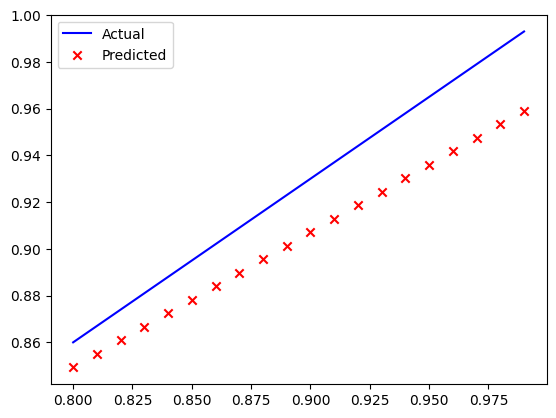

In [35]:
plt.plot(X_test_regression.to("cpu"), y_test_regression.to("cpu"), c='b', label="Actual")
plt.scatter(X_test_regression.to("cpu"), y_preds.to("cpu"), marker='x', c='r', label="Predicted")
plt.legend()
plt.show()


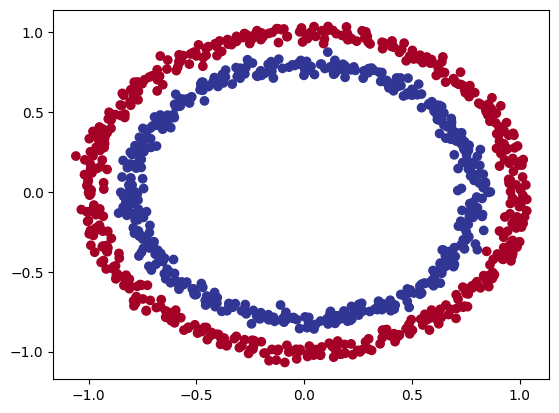

In [36]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [37]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [38]:
class CircleModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=256)
    self.layer_2 = nn.Linear(in_features=256, out_features=128)
    self.layer_3 = nn.Linear(in_features=128, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [39]:
circle_model_v2 = CircleModelv2().to(device)
circle_model_v2

CircleModelv2(
  (layer_1): Linear(in_features=2, out_features=256, bias=True)
  (layer_2): Linear(in_features=256, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

In [40]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=circle_model_v2.parameters(), lr=0.01)

In [41]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [42]:
circle_model_v2.train()
epochs = 5000
for epoch in range(epochs):
  circle_model_v2.train()
  y_logits = circle_model_v2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)

  optimizer.zero_grad()
  loss.backward()
  acc = accuracy(y_train, y_pred)
  optimizer.step()

  circle_model_v2.eval()
  with torch.inference_mode():
    test_logits = circle_model_v2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_test, test_pred)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Accuracy: {acc: .2f}%, Loss: {loss: .4f} | Test Accuracy: {test_acc: .2f}%, Test Loss: {test_loss: .4f}")

Epoch: 0 | Accuracy:  47.00%, Loss:  0.6938 | Test Accuracy:  43.50%, Test Loss:  0.6942
Epoch: 100 | Accuracy:  54.12%, Loss:  0.6905 | Test Accuracy:  49.50%, Test Loss:  0.6915
Epoch: 200 | Accuracy:  67.12%, Loss:  0.6874 | Test Accuracy:  64.00%, Test Loss:  0.6892
Epoch: 300 | Accuracy:  74.00%, Loss:  0.6845 | Test Accuracy:  73.00%, Test Loss:  0.6869
Epoch: 400 | Accuracy:  77.00%, Loss:  0.6811 | Test Accuracy:  76.50%, Test Loss:  0.6843
Epoch: 500 | Accuracy:  79.00%, Loss:  0.6776 | Test Accuracy:  77.00%, Test Loss:  0.6814
Epoch: 600 | Accuracy:  80.25%, Loss:  0.6738 | Test Accuracy:  79.00%, Test Loss:  0.6783
Epoch: 700 | Accuracy:  82.12%, Loss:  0.6696 | Test Accuracy:  79.00%, Test Loss:  0.6748
Epoch: 800 | Accuracy:  83.50%, Loss:  0.6647 | Test Accuracy:  81.00%, Test Loss:  0.6706
Epoch: 900 | Accuracy:  85.75%, Loss:  0.6591 | Test Accuracy:  83.50%, Test Loss:  0.6658
Epoch: 1000 | Accuracy:  88.00%, Loss:  0.6525 | Test Accuracy:  86.00%, Test Loss:  0.6602


In [43]:
circle_model_v2.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(circle_model_v2(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))